In [1]:
import os
os.chdir("../")

import torch
import matplotlib.pyplot as plt

from models.cev_class import Cev

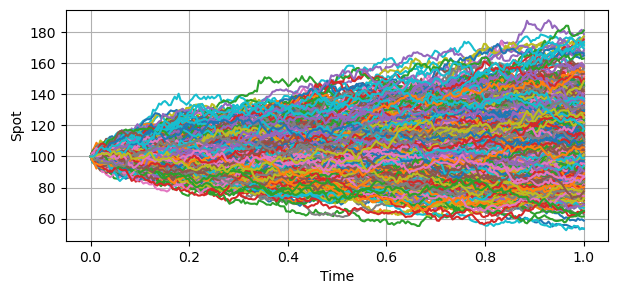

In [3]:
torch.manual_seed(42)

dt = torch.tensor(1 / 252)
T = 1.0
S0 = torch.tensor(100.0)

mu = torch.tensor(0.1)
delta = torch.tensor(2.0)
beta = torch.tensor(1.0)
cev_model = Cev(mu, delta, beta)
#params = torch.tensor([S0, mu, delta, beta])

S = cev_model.simulate(S0, dt, T, M=1000)

plt.figure(figsize=(7,3))
plt.plot(torch.linspace(0, T, len(S)), S)
plt.xlabel('Time')
plt.ylabel('Spot')
plt.grid()
plt.show()

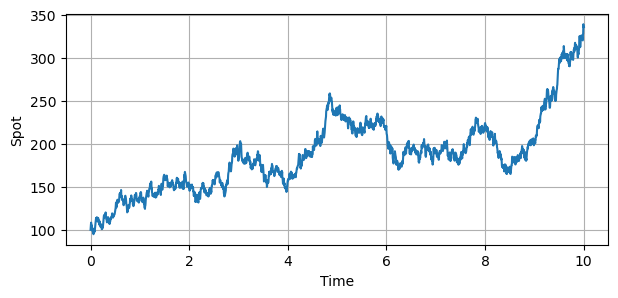

In [4]:
torch.manual_seed(42)

T = torch.tensor(10.0, requires_grad=False)
h = torch.tensor(1/252, requires_grad=False)
n = torch.round(T/h)
S0 = 100

mu_true = torch.tensor(0.1)
beta_true = torch.tensor(1.0)
delta_true = 0.3 * S0**(-((beta_true - 2) / 2))
cev_model = Cev(mu_true, delta_true, beta_true)
S = cev_model.simulate(S0, h, T, M=1).squeeze()

plt.figure(figsize=(7,3))
plt.plot(torch.linspace(0, T, len(S)), S)
plt.xlabel('Time')
plt.ylabel('Spot')
plt.grid()
plt.show()

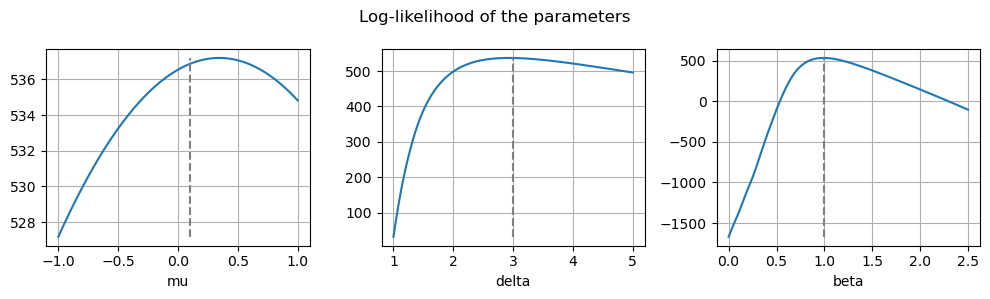

In [ ]:
t = 252 
window=200
n_params = 3
fig, axs = plt.subplots(figsize=(10, 3), nrows=1, ncols=n_params)

mus = torch.linspace(-1.0, 1.0, 100)
likelihood = torch.zeros_like(mus)
for i, mu in enumerate(mus):
    model = Cev(mu, delta_true, beta_true)
    likelihood[i] = model.forward(S, t, window, h)
axs[0].plot(mus, likelihood.detach(), label='log-likelihood')
axs[0].vlines(mu_true, torch.min(likelihood.detach()), torch.max(likelihood.detach()), linestyles='dashed', colors='grey', label='true')
axs[0].set_xlabel('mu')

deltas = torch.linspace(1.0, 5.0, 100)
likelihood = torch.zeros_like(deltas)
for i, delta in enumerate(deltas):
    model = Cev(mu_true, delta, beta_true)
    likelihood[i] = model.forward(S, t, window, h)
axs[1].plot(deltas, likelihood.detach(), label='log-likelihood')
axs[1].vlines(delta_true, torch.min(likelihood.detach()), torch.max(likelihood.detach()), linestyles='dashed', colors='grey', label='true')
axs[1].set_xlabel('delta')

betas = torch.linspace(0.0, 2.5, 100)
likelihood = torch.zeros_like(betas)
for i, beta in enumerate(betas):
    model = Cev(mu_true, delta_true, beta)
    likelihood[i] = model.forward(S, t, window, h)
axs[2].plot(betas, likelihood.detach(), label='log-likelihood')
axs[2].vlines(beta_true, torch.min(likelihood.detach()), torch.max(likelihood.detach()), linestyles='dashed', colors='grey', label='true')
axs[2].set_xlabel('beta')

for i in range(n_params):
    axs[i].grid()

fig.suptitle('Log-likelihood of the parameters')
fig.tight_layout()